# Building a Perceptron
- As we know, a perceptron is the basic block in a Neural Network. We will start with the very basics and see how the perceptron processes the data and makes decisions. 

In [2]:
import numpy as np #Importing a library called Numpy

# Making a tiny toy dataset 
- Now let's create a 2D points (x1, x2) and binary label y (0 and 1) dataset.
- We will set a rule (hidden from the model): if x1 + x2 > 0 then y=1 else y=0

In [9]:
np.random.seed(0) #This makes sure that we can reproduce the results in the future 

N =200 #number of samples
X = np.random.rand(N,2) #create random numbers, shape: (N,2)
y = (X[:,0] + X[:,1]>0).astype(int) #Here we are setting the rule (If value of X at 0 and value of X at 1 is greater than 0, then save it as type integer)

print(X) #Let's see how X looks like

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  0.11872772]


In [10]:
print(y) #Let's see how y looks like

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Creating Helper Functions
- Now that we have a dataset, we need helper functions to do the calculations for us.
- We need a sigmoid function (squashes any real number into (0,1). Used to output probabilities)

The sigmoid function, sigma(z)= 1 / (1 + e ^ -z), is a non-linear S-shaped activation function used in deep learning to map input values to a probability range between 0 and 1. Primarily used in the output layer for binary classification, it enables networks to learn non-linear decision boundaries.

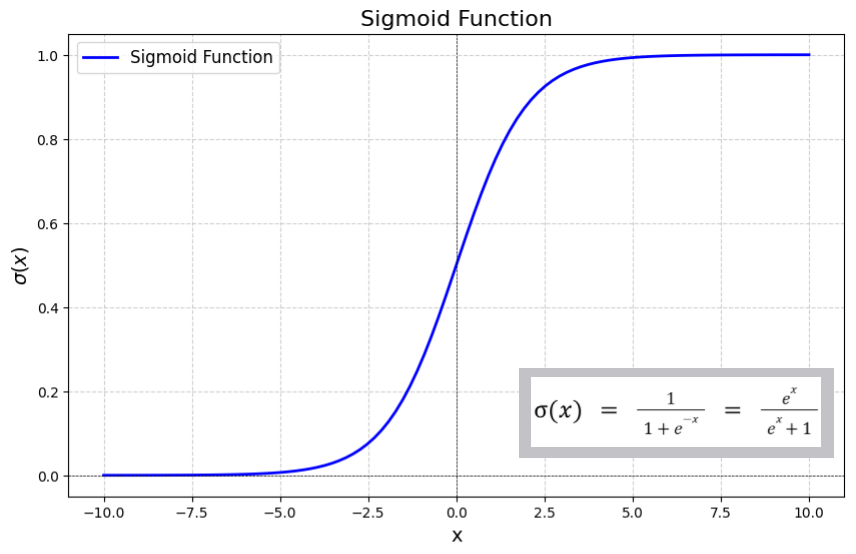

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #Take input value z, and return the value of z by doing the calculation 

In [12]:
def predict_proba(X, w, b): 
    z = X @ w + b
    return sigmoid(z)
#Compute the linear score (y=mx+b) and convert the probability with sigmoid function

In [14]:
def binary_cross_entropy(y_true, y_pred, eps=1e-12): 
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
#Loss function for binary classification. 
# We use eps here to avoid log(0) which is undefined, is present, will give errors. 

# Initialize parameters 
- Now let's initialize the single-layer network parameters:
- w: Weights for each input feature
- b: bias

In [15]:
w = np.zeros(X.shape[1]) #shape: (2,)
b = 0.0

# Train with Gradient Descent

In [16]:
lr = 0.1 # learning rate 
epochs = 2000 

for epoch in range(epochs):
    # ---- Forward pass ----
    y_hat = predict_proba(X, w, b)  # predicted probabilities, shape: (N,)

    # ---- Compute loss (just for monitoring) ----
    loss = binary_cross_entropy(y, y_hat)

    # ---- Backward pass (gradients) ----
    # For logistic regression:
    # dL/dz = (y_hat - y)
    dz = (y_hat - y)                        # shape: (N,)
    dw = (X.T @ dz) / N                     # shape: (2,)
    db = np.mean(dz)                        # scalar

    # ---- Update parameters ----
    w -= lr * dw
    b -= lr * db

    # Print progress sometimes
    if epoch % 200 == 0:
        print(f"epoch {epoch:4d} | loss = {loss:.4f}")

epoch    0 | loss = 0.6931
epoch  200 | loss = 0.0383
epoch  400 | loss = 0.0193
epoch  600 | loss = 0.0129
epoch  800 | loss = 0.0097
epoch 1000 | loss = 0.0078
epoch 1200 | loss = 0.0065
epoch 1400 | loss = 0.0056
epoch 1600 | loss = 0.0049
epoch 1800 | loss = 0.0043


- As we can see, the loss decreases as the number of epochs increases.
- This means that the network is learning the equation. 

# Evaluate 
- Convert possibilities to hard 0/1 predictions using a threshold of 0.5

In [17]:
y_pred = (predict_proba(X, w, b) >= 0.5).astype(int)

accuracy = np.mean(y_pred == y)
print("\nFinal parameters:")
print("w =", w)
print("b =", b)
print(f"Training accuracy = {accuracy:.3f}")


Final parameters:
w = [1.78436453 1.68831411]
b = 4.052143303254056
Training accuracy = 1.000


# What we did? 

- The model computes a weighted sum of inputs: z = x1*w1 + x2*w2 + b
- Then it converts that into a probability using sigmoid
- It checks how wrong it is (loss), then nudges w and b so the loss becomes smaller